# Default model with debt rule

In [15]:
using LinearAlgebra, Statistics
using Parameters, QuantEcon, DataFrames, Plots, Random, Distributions
using NBInclude,BenchmarkTools, Profile
using StatsBase
using LaTeXStrings
using Interpolations
using Optim

@nbinclude("Parameters.ipynb")
@nbinclude("fun_procedures.ipynb")
@nbinclude("VFI.ipynb")
@nbinclude("Simulation.ipynb")
@nbinclude("fun_plots.ipynb")

plot_deuda_prudente (generic function with 1 method)

## Parameters

In [2]:
Ny=15; Nbs=1; Nb=45; Nc=15;MMM=2.0   
# Ny=5; Nbs=10; Nb=10; Nc=5;MMM=2.0   #BORRAR: PRUEBA
τ= 0.22 #NEW
σ=1.77+2.5*0
β=0.87 +0.85*0 #NEW
μ=1/9*0 + 1/7.5 #NEW
π=0.6
ψ=1/1.7
ω=0.051*1.77

SDFC=1.
δ=-141*3.7
α0=11/2                            
z=0.074*0.5
σshock=0.0125*2.2*0.85
ρshock=0.56                 
σcop=0.25*2.7
ρcop = 0.34                       
rf=0.010*4
Δ=1.0
qs=0.945                                 
b_inf=-0.5; b_sup=0.1; bs_inf=0.; bs_sup=0.000001           
toldiffvalue = 1e-3
crash = 0.0;         

## I. Benchmark

In [3]:
ae3 = Economy(restriccion=0,
     Ny=Ny, Nbs=Nbs, Nb=Nb, Nc=Nc,                              #Grid size              
     τ=τ, σ=σ, β=β, μ=μ, π=π, ψ=ψ, ω=ω,                         #Model parameters
     SDFC=SDFC, δ=δ, α0=α0,                                     #SDF
     σshock=σshock, ρshock=ρshock, MMM=MMM,                     #Productivity shock 
     z=z, σcop=σcop, ρcop = ρcop,                               #Commodity shock
     rf=rf, Δ=Δ, qs=qs,                                         #Price and maturity
     b_inf=b_inf, b_sup=b_sup, bs_inf=bs_inf, bs_sup=bs_sup,    #Debt/asset bounds
     toldiffvalue = toldiffvalue,                               #Tolerance
     crash=crash);                              

fun_shocks_grid(ae3)
@time VFI_new(ae3)
@time policy!(ae3)
fun_momentos(ae3)

Convergence OK, (iteration, valuediff):(69, 0.0009881)
 18.941205 seconds (2.30 M allocations: 140.928 MiB, 0.16% gc time, 7.26% compilation time)
  0.151233 seconds (106.20 k allocations: 5.894 MiB, 98.59% compilation time)
Mean of B/Y:  -0.379
Std of B/Y:   0.0483
Min of B/Y:   -0.473
Mean of BS/Y: 0.0
Std of BS/Y:  0.0
Mean of BN/Y: -0.379
Std of BN/Y:  0.0483
Mean Spread:  201.0
Med Spread:   46.99999999999996
Max of spread:1890.0
Mean of r:    0.0601
Std of r:     0.039
Mean of g:    0.245
Std of g:     0.024
Mean of Θ:    0.0016
Std of Θ:     0.0303

Corr(r,y):    -0.264
Corr(g/y,y):  0.354
Corr(g,y):    0.783
Corr(r,by):   -0.228
Corr(r,bsy):  NaN
Corr(r,bny):  -0.228
Corr(y,bs):   NaN
Corr(y,bsy):  NaN
Corr(y,b):    0.311
Corr(y,by):   0.802
N_def:2332
N_vec:998000
Probabilidad de default: 0.234


In [4]:
table_debt_g_escenario(ae3)

Escenario         Bueno  Intermedio  Adverso
Gasto fiscal/GDP: (0.255, 0.248, 0.223)
Gasto fiscal:     (0.212, 0.189, 0.154)
GDP no cobre:     (0.762, 0.714, 0.667)
Deuda bruta:      (-0.325, -0.381, -0.427)
Fondos soberanos: (0.0, 0.0, 0.0)
Deuda neta:       (-0.325, -0.381, -0.427)
Spread:           (131.132, 184.551, 318.608)
Prob. Default(%): (0.163, 0.2, 0.403)


In [5]:
#Debt limit
b_limit2 = -0.38; #BASE
# b_limit2 = -0.3;
# b_limit2 = -0.35;
# b_limit2 = -0.42;

## II. Debt rule

In [6]:
ae_DE3 = Economy(restriccion=1, b_limit=b_limit2,
     Ny=Ny, Nbs=Nbs, Nb=Nb, Nc=Nc,                              #Grid size              
     τ=τ, σ=σ, β=β, μ=μ, π=π, ψ=ψ, ω=ω,                         #Model parameters
     SDFC=SDFC, δ=δ, α0=α0,                                     #SDF
     σshock=σshock, ρshock=ρshock, MMM=MMM,                     #Productivity shock 
     z=z, σcop=σcop, ρcop = ρcop,                               #Commodity shock
     rf=rf, Δ=Δ, qs=qs,                                         #Price and maturity
     b_inf=b_inf, b_sup=b_sup, bs_inf=bs_inf, bs_sup=bs_sup,    #Debt/asset bounds
     toldiffvalue = toldiffvalue,                               #Tolerance
     crash=crash);       

fun_shocks_grid(ae_DE3)
@time VFI_new(ae_DE3)
@time policy!(ae_DE3)
fun_momentos(ae_DE3)

Convergence OK, (iteration, valuediff):(69, 0.0009478)
 10.785382 seconds (932 allocations: 21.205 MiB)
  0.002402 seconds (2 allocations: 512 bytes)
Mean of B/Y:  -0.319
Std of B/Y:   0.0452
Min of B/Y:   -0.38
Mean of BS/Y: 0.0
Std of BS/Y:  0.0
Mean of BN/Y: -0.319
Std of BN/Y:  0.0452
Mean Spread:  199.99999999999997
Med Spread:   46.99999999999996
Max of spread:1890.0
Mean of r:    0.06
Std of r:     0.039
Mean of g:    0.249
Std of g:     0.024
Mean of Θ:    0.001
Std of Θ:     0.0314

Corr(r,y):    -0.262
Corr(g/y,y):  0.295
Corr(g,y):    0.769
Corr(r,by):   -0.129
Corr(r,bsy):  NaN
Corr(r,bny):  -0.129
Corr(y,bs):   NaN
Corr(y,bsy):  NaN
Corr(y,b):    0.25
Corr(y,by):   0.719
N_def:9188
N_vec:998000
Probabilidad de default: 0.921


In [7]:
table_debt_g_escenario(ae_DE3)

Escenario         Bueno  Intermedio  Adverso
Gasto fiscal/GDP: (0.258, 0.252, 0.228)
Gasto fiscal:     (0.214, 0.191, 0.158)
GDP no cobre:     (0.761, 0.713, 0.666)
Deuda bruta:      (-0.271, -0.321, -0.36)
Fondos soberanos: (0.0, 0.0, 0.0)
Deuda neta:       (-0.271, -0.321, -0.36)
Spread:           (131.187, 183.472, 316.234)
Prob. Default(%): (0.891, 0.898, 1.016)


## III. Debt rule and escape clause

In [8]:
ae_DUC3 = Economy(restriccion=2, b_limit=b_limit2, 
     Ny=Ny, Nbs=Nbs, Nb=Nb, Nc=Nc,                              #Grid size              
     τ=τ, σ=σ, β=β, μ=μ, π=π, ψ=ψ, ω=ω,                         #Model parameters
     SDFC=SDFC, δ=δ, α0=α0,                                     #SDF
     σshock=σshock, ρshock=ρshock, MMM=MMM,                     #Productivity shock 
     z=z, σcop=σcop, ρcop = ρcop,                               #Commodity shock
     rf=rf, Δ=Δ, qs=qs,                                         #Price and maturity
     b_inf=b_inf, b_sup=b_sup, bs_inf=bs_inf, bs_sup=bs_sup,    #Debt/asset bounds
     toldiffvalue = toldiffvalue,                               #Tolerance
     crash=crash);       

fun_shocks_grid(ae_DUC3)
@time VFI_new(ae_DUC3)
@time policy!(ae_DUC3)
fun_momentos(ae_DUC3)

Convergence OK, (iteration, valuediff):(69, 0.000965)
 14.414780 seconds (932 allocations: 21.205 MiB)
  0.002117 seconds (2 allocations: 512 bytes)
Mean of B/Y:  -0.345
Std of B/Y:   0.0484
Min of B/Y:   -0.451
Mean of BS/Y: 0.0
Std of BS/Y:  0.0
Mean of BN/Y: -0.345
Std of BN/Y:  0.0484
Mean Spread:  197.99999999999997
Med Spread:   29.999999999999957
Max of spread:1890.0
Mean of r:    0.0598
Std of r:     0.039
Mean of g:    0.247
Std of g:     0.025
Mean of Θ:    0.001
Std of Θ:     0.0306

Corr(r,y):    -0.262
Corr(g/y,y):  0.273
Corr(g,y):    0.752
Corr(r,by):   -0.171
Corr(r,bsy):  NaN
Corr(r,bny):  -0.171
Corr(y,bs):   NaN
Corr(y,bsy):  NaN
Corr(y,b):    0.317
Corr(y,by):   0.765
N_def:7730
N_vec:998000
Probabilidad de default: 0.775


In [9]:
table_debt_g_escenario(ae_DUC3)

Escenario         Bueno  Intermedio  Adverso
Gasto fiscal/GDP: (0.258, 0.248, 0.236)
Gasto fiscal:     (0.214, 0.188, 0.163)
GDP no cobre:     (0.761, 0.713, 0.667)
Deuda bruta:      (-0.295, -0.344, -0.401)
Fondos soberanos: (0.0, 0.0, 0.0)
Deuda neta:       (-0.295, -0.344, -0.401)
Spread:           (130.945, 180.587, 316.463)
Prob. Default(%): (0.785, 0.776, 0.76)


## IV. Plots

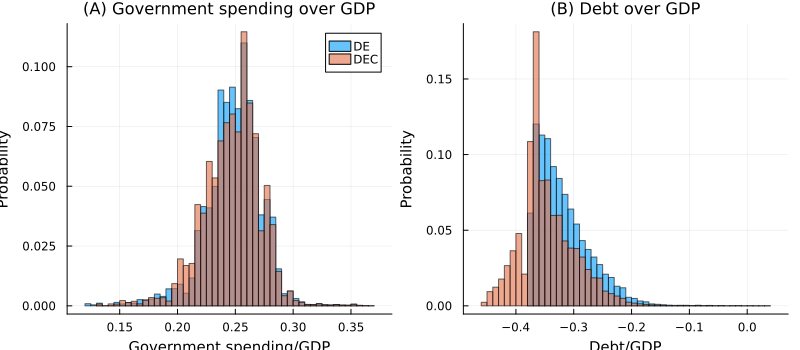

In [16]:
plot_hist_paper(ae3, ae_DE3, ae_DUC3, escenario=false)

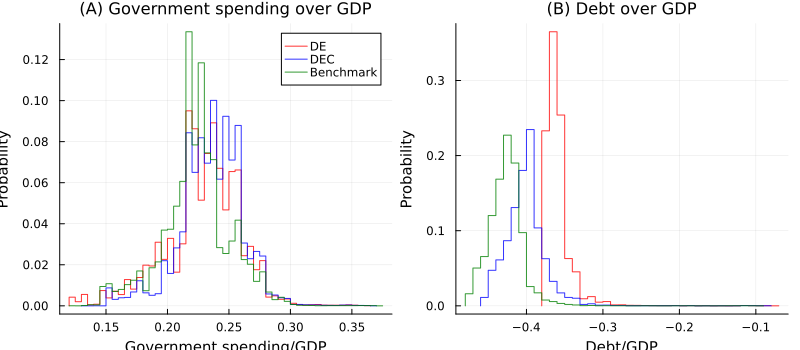

In [17]:
plot_hist_paper(ae3, ae_DE3, ae_DUC3, escenario=true, )

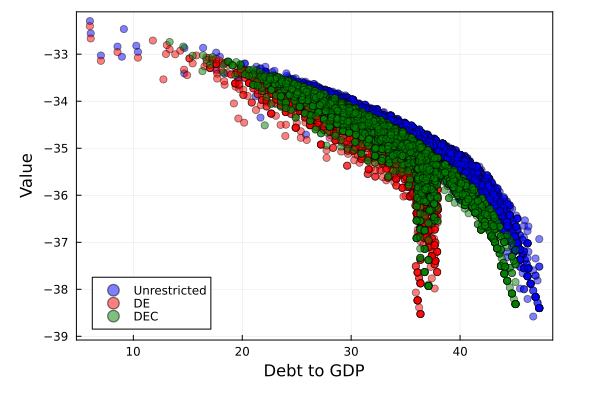

In [18]:
plot_simulation(ae3, ae_DE3, ae_DUC3)


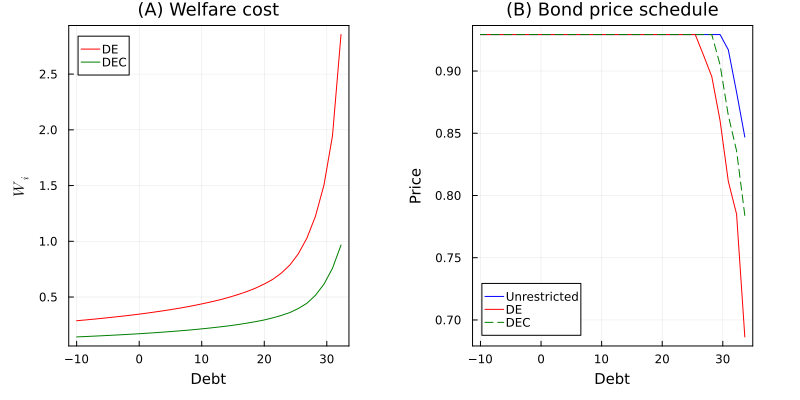

In [19]:
p1 = plot_welfare(ae3, ae_DE3, ae_DUC3, activos=false, ratio=false,
             promedio=true, paper=true, b_in=14, bs_in=1,)

p2 = plot_policy_intrate(ae3, ae_DE3, ae_DUC3,
             b_in=13)

pl = plot(p1,p2, size=(800, 400), fmt = :png)